In [1]:
# pip install imbalanced-learn

In [2]:
# load required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import  SMOTE
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import pickle

In [3]:
# Load Dataset
d = pd.read_csv('E:\\Data_Analysis_Datasets\\fitness_dataset.csv')

In [4]:
# copy the dataframe
df = d.copy()

I copy DataFrames to create an independent duplicate of the original data, allowing for modifications and analyses without affecting the initial dataset and maintaining its integrity.

In [5]:
# first 5 records
df.head()

age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0   56        152         65        69.6           117.0          NaN   
1   69        186         95        60.8           114.8          7.5   
2   46        192        103        61.4           116.4          NaN   
3   32        189         83        60.2           130.1          7.0   
4   60        175         99        58.1           115.8          8.0   

   nutrition_quality  activity_index smokes gender  is_fit  
0               2.37            3.97     no      F       1  
1               8.77            3.19      0      F       1  
2               8.20            2.03      0      F       0  
3               6.18            3.68      0      M       1  
4               9.95            4.83    yes      F       1

In [6]:
# last 5 records
df.tail()

age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
1995   52        173         98        60.7           106.1          NaN   
1996   61        186         74        51.4           123.8          9.4   
1997   77        198         89        76.7           103.6          8.3   
1998   62        190         63        80.7           115.9          6.7   
1999   51        166         78        89.3           101.8          8.3   

      nutrition_quality  activity_index smokes gender  is_fit  
1995               1.54            3.25      1      M       1  
1996               8.63            3.15     no      M       1  
1997               1.98            3.36    yes      M       0  
1998               9.21            2.39      1      F       0  
1999               4.42            1.02      1      M       0

- Age: Age of the individual in years
- height_cm: Height in centimeters
- weight_kg: Weight in kilograms
- heart_rate: Resting heart rate in beats per minute
- blood_pressure: Systolic blood pressure in mmHg
- sleep_hours: Average hours of sleep per day
- nutrition_quality: Daily nutrition quality score between 0 and 10
- activity_index: Physical activity level score between 1 and 5
- smokes: Smoking status (mixed types: 0, 1, "yes", "no")
- gender: Gender of individual, either 'M' or 'F'
- is_fit: Target variable: 1 if the person is fit, 0 otherwise

In [7]:
# Total Number of Rows and Columns
print("Total Number of Rows",df.shape[0])
print("Total Number of Columns",df.shape[1])

Total Number of Rows 2000
Total Number of Columns 11


In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [9]:
# Stastical Summary
df.describe()

age   height_cm    weight_kg   heart_rate  blood_pressure  \
count  2000.000000  2000.00000  2000.000000  2000.000000     2000.000000   
mean     49.114000   174.53300    83.540500    70.288600      119.908850   
std      17.926564    14.37175    25.852534    11.846339       14.578032   
min      18.000000   150.00000    30.000000    45.000000       90.000000   
25%      34.000000   162.00000    64.000000    62.100000      109.700000   
50%      49.000000   174.00000    83.000000    70.250000      120.000000   
75%      65.000000   187.00000   102.000000    78.425000      129.800000   
max      79.000000   199.00000   250.000000   118.600000      171.200000   

       sleep_hours  nutrition_quality  activity_index       is_fit  
count  1840.000000        2000.000000     2000.000000  2000.000000  
mean      7.513315           5.035140        2.999040     0.399500  
std       1.502031           2.864156        1.136383     0.489918  
min       4.000000           0.000000        1.000000     0.000000  
25%       6.500000           2.547500        2.037500     0.000000  
50%       7.500000           5.065000        2.980000     0.000000  
75%       8.600000           7.470000        3.950000     1.000000  
max      12.000000          10.000000        4.990000     1.000000

### General Overview
- **Population size:** 2000 individuals  
- **Target variable:** `is_fit` (binary: 0 = not fit, 1 = fit)  
- **Age range:** 18–79 years (avg ~49 years, fairly balanced spread)  

---

### Health & Body Stats
- **Height:** Mean 174.5 cm (range: 150–199 cm)  
- **Weight:** Mean 83.5 kg, SD ~25.9 → wide variation (30–250 kg)  
- **BMI implication:** Possible overweight tendency (mean 174 cm height with 83 kg weight)  
- **Heart Rate:** Avg ~70 bpm, normal range (min 45, max 118.6)  
- **Blood Pressure (systolic):** Avg 120 mmHg (healthy range, but max 171.2 → some hypertensive cases)  

---

### Lifestyle Factors
- **Sleep Hours:** Avg 7.5 hrs (min 4, max 12)  
  - 25% sleep <6.5 hrs (short sleepers)  
  - 75% sleep ≥8.6 hrs (healthy sleeping group)  

- **Nutrition Quality (0–10 scale):** Mean 5.0, balanced but variable  
  - Some individuals scored 0 (very poor diet)  

- **Activity Index (1–5 scale):** Mean ~3.0  
  - Low activity: ~2 (25th percentile)  
  - High activity: ~4 (75th percentile)  

---

### Fitness Status
- **is_fit Distribution:** Mean 0.399 → ~40% classified as “fit”, ~60% “not fit”  
- Fit individuals tend to cluster at higher sleep hours, better nutrition, and higher activity levels  


In [10]:
# Column Names
df.columns

Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes',
       'gender', 'is_fit'],
      dtype='object')

In [11]:
# Check Null Values
df.isnull().sum()

age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64

Sleep Hours have total 160 values are null that full fill using mode operation

In [12]:
df['sleep_hours'].value_counts()

sleep_hours
7.4     55
7.9     52
7.6     51
7.7     50
7.0     50
        ..
12.0     2
11.2     2
4.2      1
11.6     1
11.7     1
Name: count, Length: 79, dtype: int64

In [13]:
df['sleep_hours'].fillna(df['sleep_hours'].mode()[0], inplace=True)

75% People sleep 8.6hr so decide to null value full fill with mode

In [14]:
print("Mode of sleep_hours:", df['sleep_hours'].mode()[0])

Mode of sleep_hours: 7.4


In [15]:
df['sleep_hours'].value_counts()

sleep_hours
7.4     215
7.9      52
7.6      51
7.0      50
7.7      50
       ... 
12.0      2
11.2      2
4.2       1
11.6      1
11.7      1
Name: count, Length: 79, dtype: int64

In [16]:
# Check Duplicated Records
df[df.duplicated()]

Empty DataFrame
Columns: [age, height_cm, weight_kg, heart_rate, blood_pressure, sleep_hours, nutrition_quality, activity_index, smokes, gender, is_fit]
Index: []

In Our Dataset We don't have any Duplicated Records

In [17]:
for col in df.columns:
    print(df[col].value_counts().sort_values(ascending=False))
    print(" ")
    print("------------------------")
    print(" ")

age
43    48
79    45
68    44
50    43
64    42
      ..
44    24
58    24
60    23
30    22
63    21
Name: count, Length: 62, dtype: int64
 
------------------------
 
height_cm
170    55
184    50
174    48
198    48
153    47
164    47
169    47
157    47
171    46
195    45
183    45
155    44
190    44
193    43
178    42
161    42
181    42
163    42
177    42
194    41
162    41
151    41
173    40
196    40
199    40
182    40
152    40
186    40
179    40
160    39
175    39
167    39
158    39
188    38
191    38
185    38
187    37
189    37
154    37
166    35
168    35
172    34
159    34
165    34
197    31
150    31
192    30
156    30
176    29
180    27
Name: count, dtype: int64
 
------------------------
 
weight_kg
103    42
57     41
72     38
98     37
61     36
       ..
58     13
220    10
200     7
30      5
250     4
Name: count, Length: 80, dtype: int64
 
------------------------
 
heart_rate
45.0     25
59.2     12
72.0     12
72.8     11
68.5     11
       

In [18]:
df['smokes'] = df['smokes'].replace({
    'yes': 'yes',
    'no': 'no',
    '1': 'yes',
    '0': 'no'
}).astype(object)

In [19]:
# Check Corelation with each Columns
df.corr(numeric_only=True)

age  height_cm  weight_kg  heart_rate  blood_pressure  \
age                1.000000   0.011447   0.029258   -0.019425       -0.037419   
height_cm          0.011447   1.000000   0.008397   -0.014375       -0.069252   
weight_kg          0.029258   0.008397   1.000000   -0.009142       -0.003803   
heart_rate        -0.019425  -0.014375  -0.009142    1.000000        0.018925   
blood_pressure    -0.037419  -0.069252  -0.003803    0.018925        1.000000   
sleep_hours       -0.031426  -0.001619   0.007034   -0.005144       -0.008506   
nutrition_quality  0.006250   0.023670  -0.006066    0.001085       -0.013776   
activity_index     0.026122   0.027825  -0.029562    0.028533        0.011486   
is_fit            -0.214002   0.064877  -0.088033    0.032763       -0.051010   

                   sleep_hours  nutrition_quality  activity_index    is_fit  
age                  -0.031426           0.006250        0.026122 -0.214002  
height_cm            -0.001619           0.023670        0.027825  0.064877  
weight_kg             0.007034          -0.006066       -0.029562 -0.088033  
heart_rate           -0.005144           0.001085        0.028533  0.032763  
blood_pressure       -0.008506          -0.013776        0.011486 -0.051010  
sleep_hours           1.000000          -0.029810       -0.031427  0.104380  
nutrition_quality    -0.029810           1.000000        0.033281  0.255423  
activity_index       -0.031427           0.033281        1.000000  0.343187  
is_fit                0.104380           0.255423        0.343187  1.000000

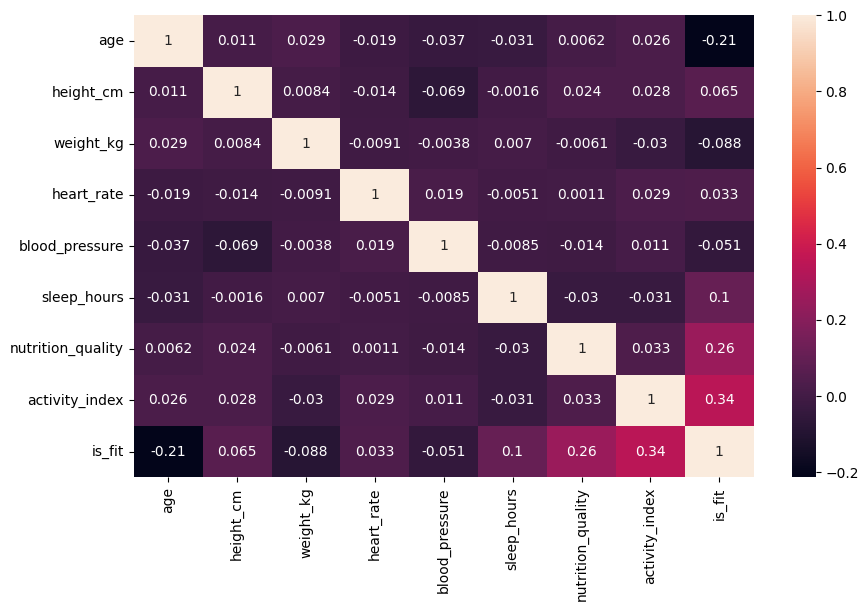

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

# Visulization

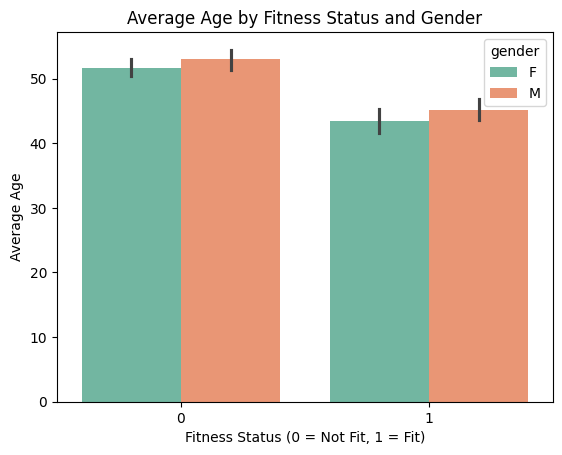

In [21]:
sns.barplot(x=df['is_fit'], y=df['age'], hue=df['gender'], palette="Set2")
plt.title('Average Age by Fitness Status and Gender')
plt.xlabel('Fitness Status (0 = Not Fit, 1 = Fit)')
plt.ylabel('Average Age')
plt.show()

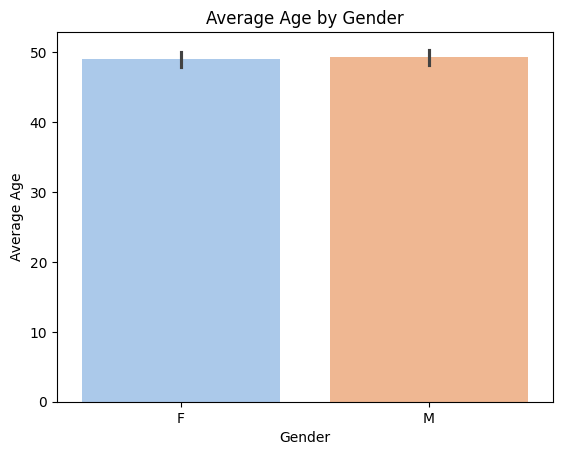

In [22]:
sns.barplot(x=df['gender'], y=df['age'], palette='pastel')
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

In [23]:
def showbarplot(column, title, y_label):
    sns.barplot(x=df['is_fit'], y=df[column], hue=df['gender'], palette="Set2")
    plt.title(title)
    plt.xlabel('Fitness Status (0 = Not Fit, 1 = Fit)')
    plt.ylabel(y_label)
    plt.show()

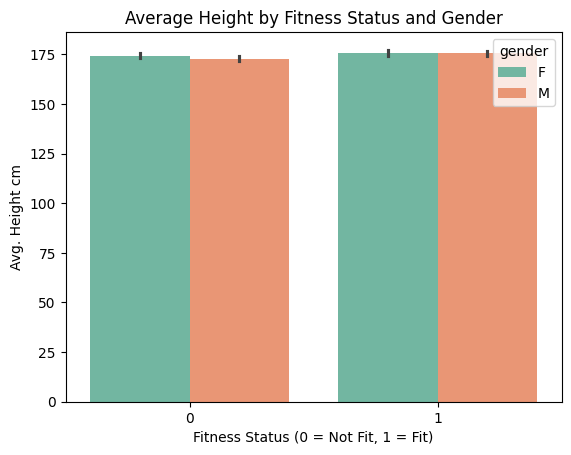

In [24]:
showbarplot('height_cm', 'Average Height by Fitness Status and Gender', 'Avg. Height cm')

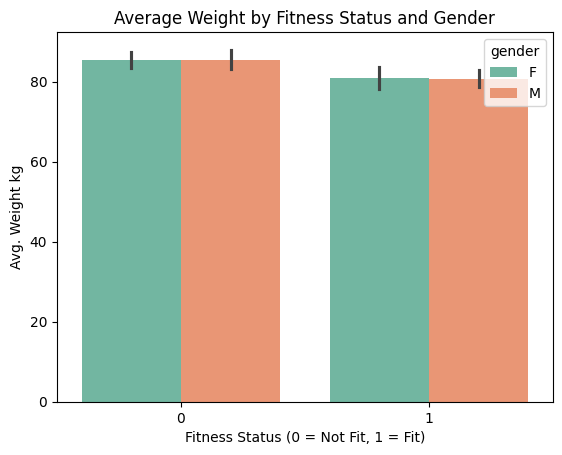

In [25]:
showbarplot('weight_kg', 'Average Weight by Fitness Status and Gender', 'Avg. Weight kg')

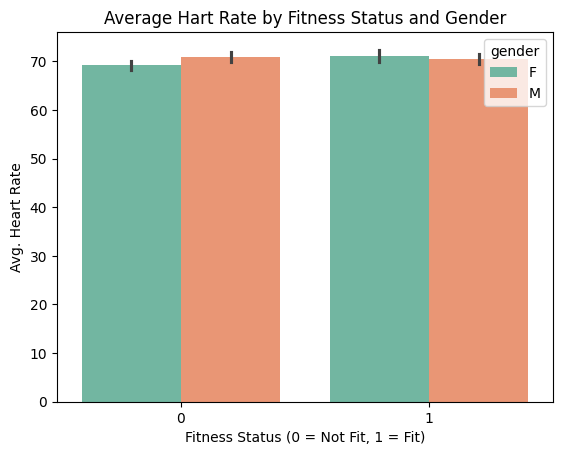

In [26]:
showbarplot('heart_rate', 'Average Hart Rate by Fitness Status and Gender', 'Avg. Heart Rate')

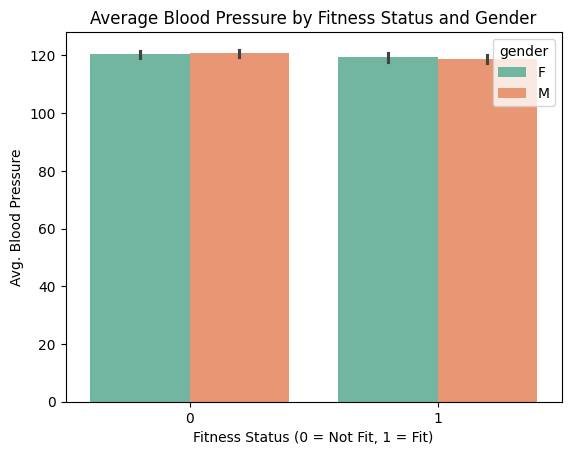

In [27]:
showbarplot('blood_pressure', 'Average Blood Pressure by Fitness Status and Gender', 'Avg. Blood Pressure')

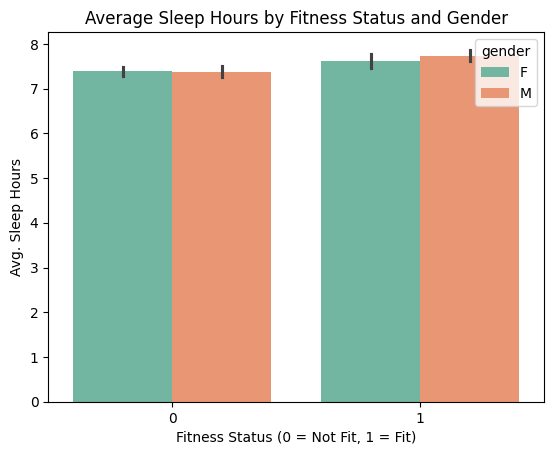

In [28]:
showbarplot('sleep_hours', 'Average Sleep Hours by Fitness Status and Gender', 'Avg. Sleep Hours')

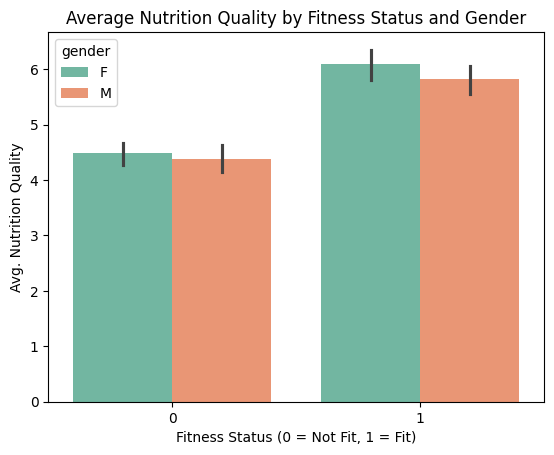

In [29]:
showbarplot('nutrition_quality', 'Average Nutrition Quality by Fitness Status and Gender', 'Avg. Nutrition Quality')

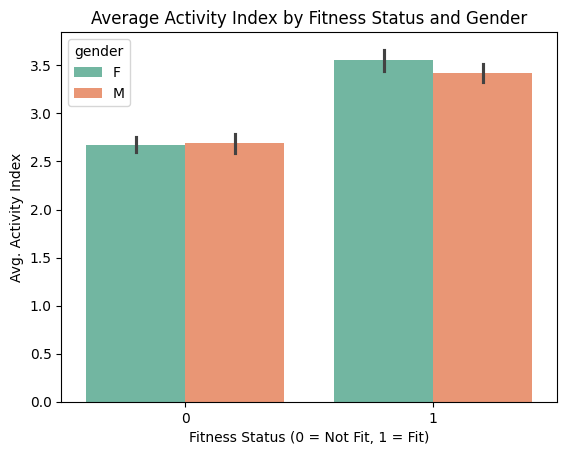

In [30]:
showbarplot('activity_index', 'Average Activity Index by Fitness Status and Gender', 'Avg. Activity Index')

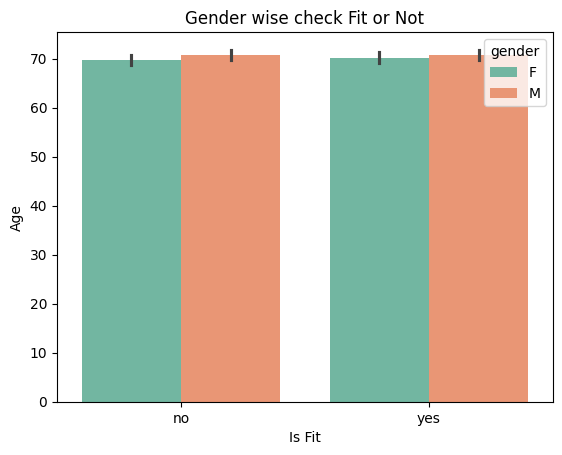

In [31]:
sns.barplot(x=df['smokes'], y=df['heart_rate'], hue=df['gender'], palette="Set2")
plt.title('Gender wise check Fit or Not')
plt.xlabel('Is Fit')
plt.ylabel('Age')
plt.show()

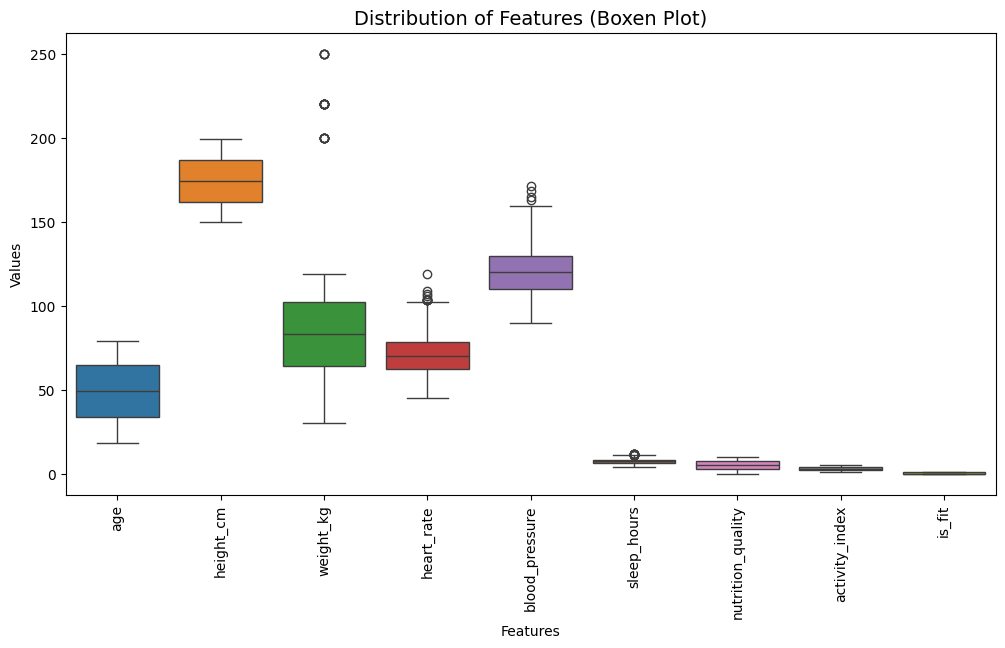

In [32]:
plt.figure(figsize=(12,6))  # Adjust figure size for readability
# sns.boxenplot(data=df)
sns.boxplot(data=df)
plt.title("Distribution of Features (Boxen Plot)", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

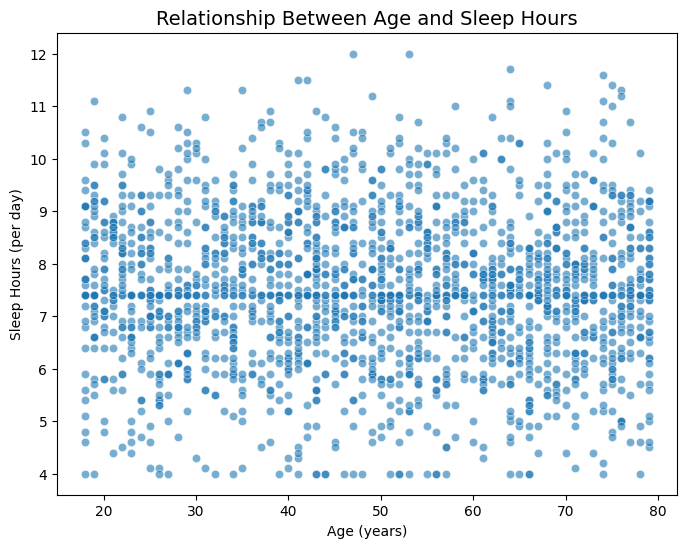

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['age'], y=df['sleep_hours'], alpha=0.6)
plt.title("Relationship Between Age and Sleep Hours", fontsize=14)
plt.xlabel("Age (years)")
plt.ylabel("Sleep Hours (per day)")
plt.show()

In [34]:
# # check distribution of All Columns
# plt.figure(figsize=(5,3))
# def distribution_column(col):
#     sns.histplot(df[col], bins=12, kde=True)
#     plt.title(f"{col} Distribution")
#     plt.show()

# Function to plot distribution of any column
def distribution_column(col):
    plt.figure(figsize=(8,4))  # Wider figure for clarity
    sns.histplot(df[col], bins=20, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


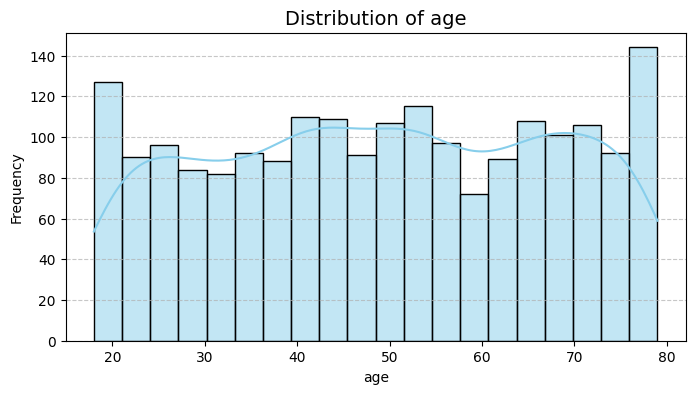

In [35]:
distribution_column('age')

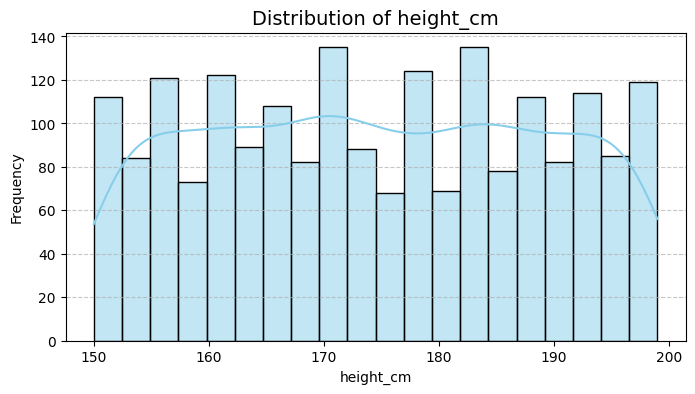

In [36]:
distribution_column('height_cm')

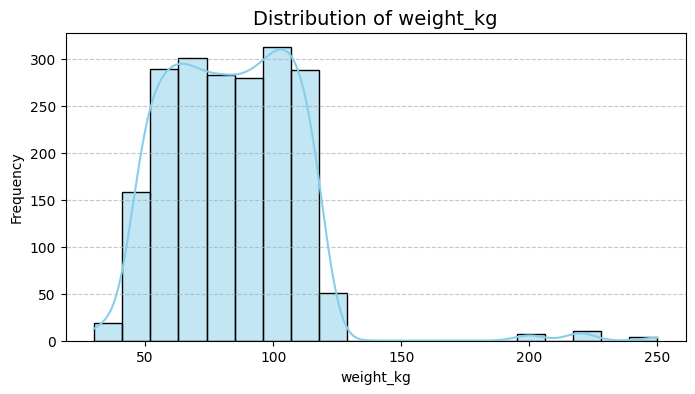

In [37]:
distribution_column('weight_kg')

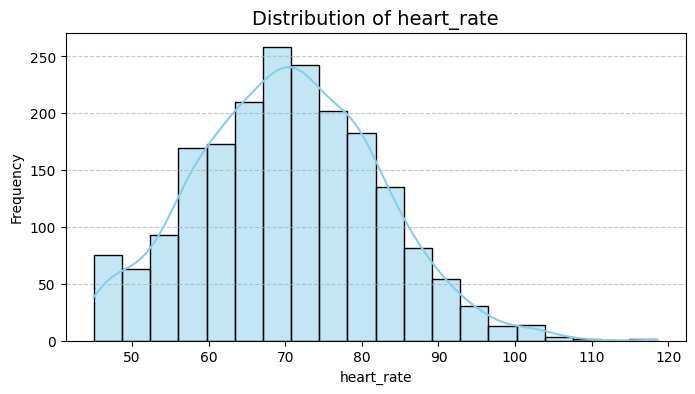

In [38]:
distribution_column('heart_rate')

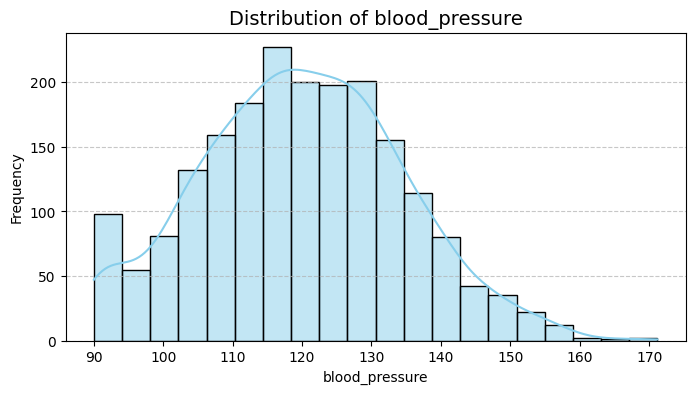

In [39]:
distribution_column('blood_pressure')

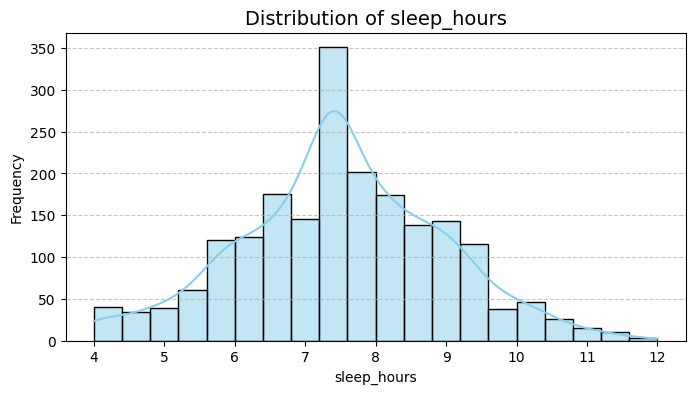

In [40]:
distribution_column('sleep_hours')

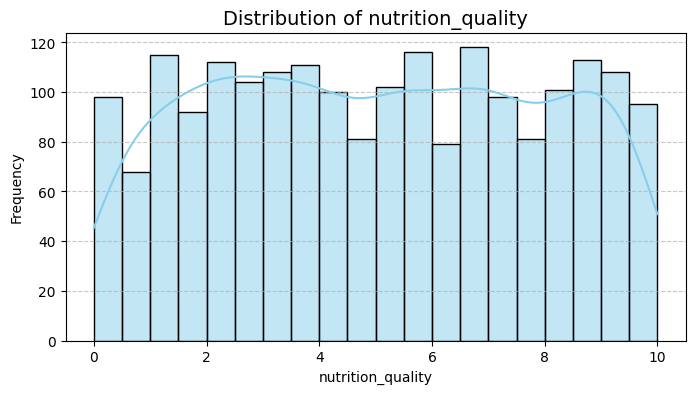

In [41]:
distribution_column('nutrition_quality')

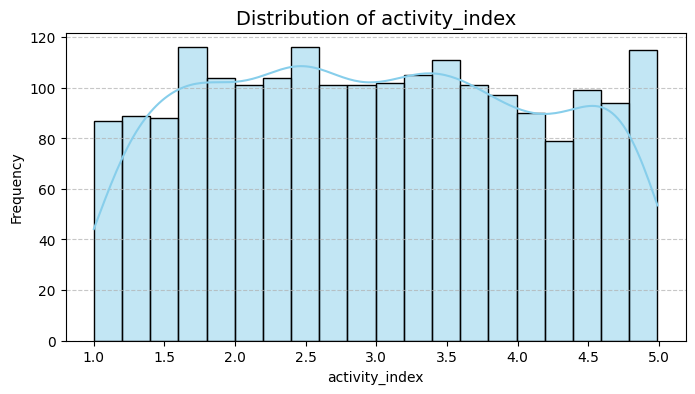

In [42]:
distribution_column('activity_index')

<Figure size 1200x1000 with 0 Axes>

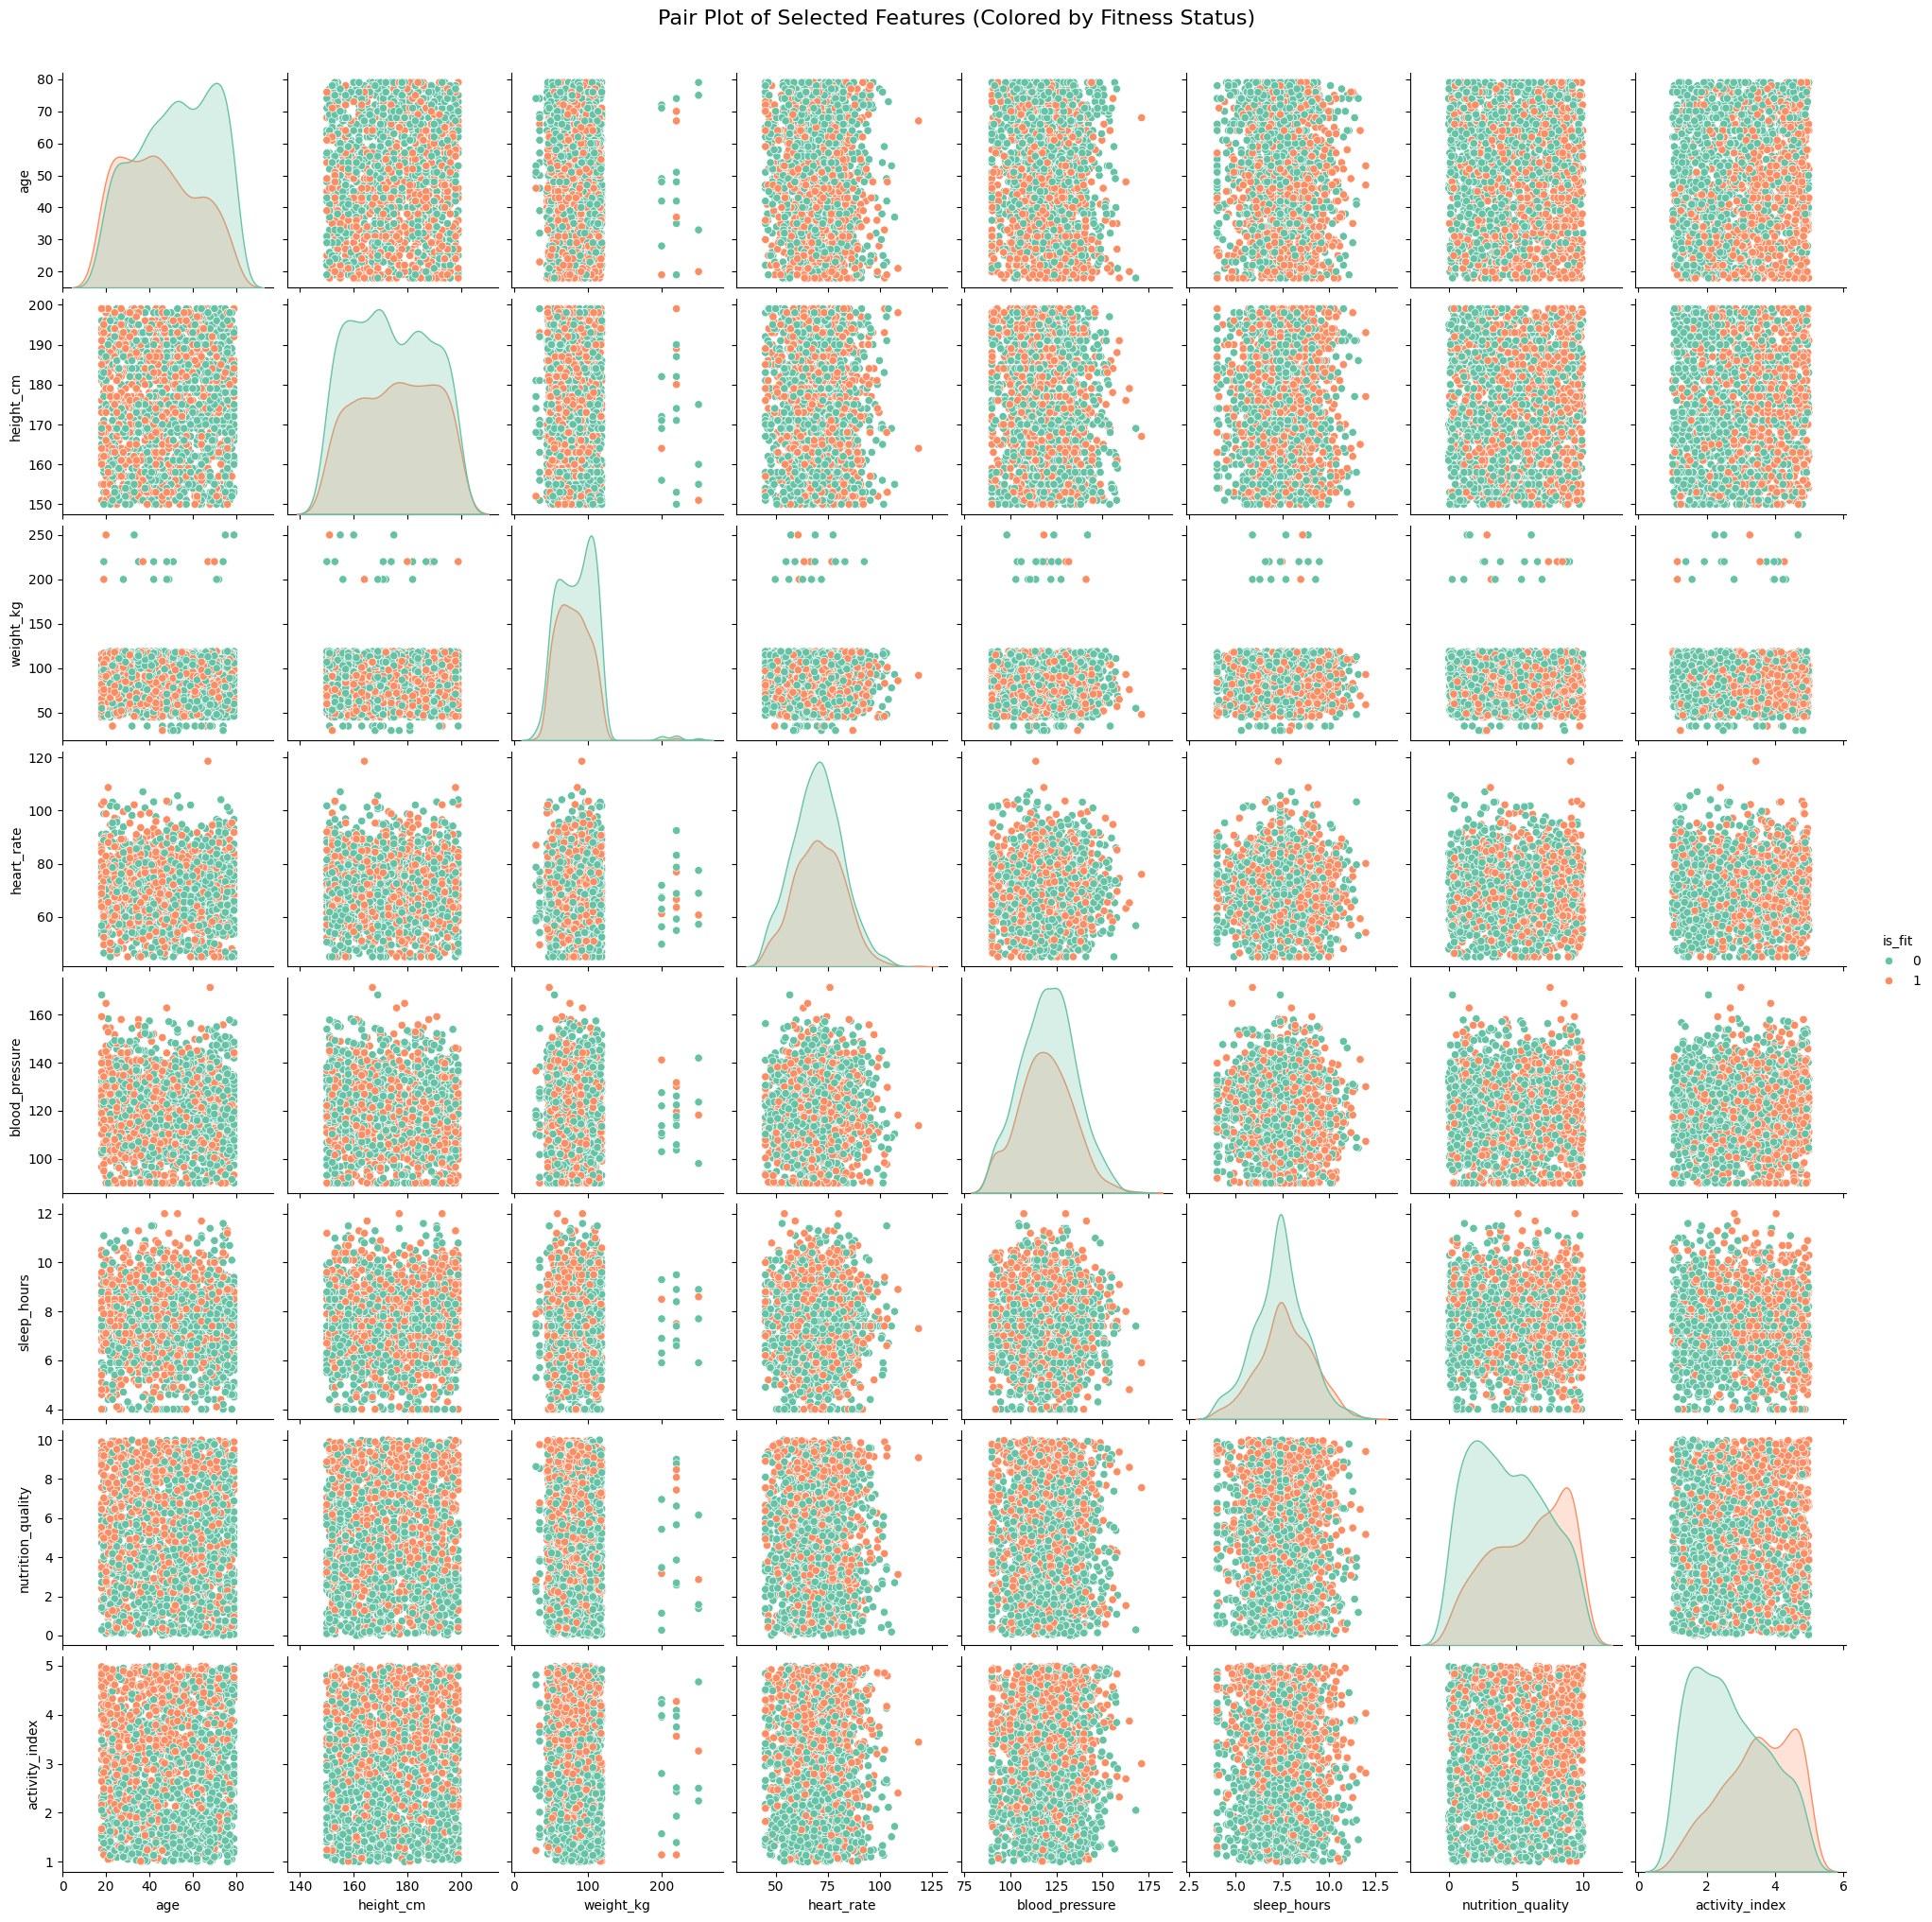

In [43]:
# Pair Plot for selected features

selected_features = [
    'age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
    'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes',
    'gender', 'is_fit'
]

plt.figure(figsize=(12,10))
sns.pairplot(df[selected_features], hue="is_fit", diag_kind="kde", palette="Set2")
plt.suptitle("Pair Plot of Selected Features (Colored by Fitness Status)", fontsize=16, y=1.02)
plt.show()

In [44]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        2000 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


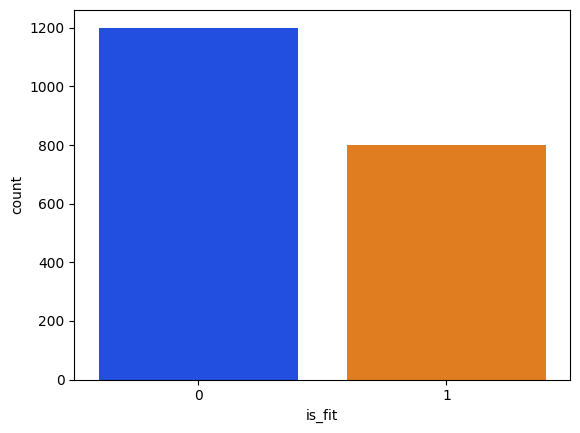

In [45]:
sns.countplot(x='is_fit',data=df,palette='bright') 
plt.show()

In [46]:
# Separate features (X) and target (y)
X = df.drop(columns=['is_fit'])   # Features
y = df['is_fit']                  # Target

In [47]:
X.shape, y.shape

((2000, 10), (2000,))

In [48]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape, y_train.shape

((1600, 10), (1600,))

1600 Row Use for Traning

In [50]:
X_test.shape, y_test.shape

((400, 10), (400,))

400 Row Use for Testing

In [51]:
# Preprocessing:
# - One-hot encode categorical features: gender, smokes
# - Standard scale numerical features

preprocess = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), ['gender', 'smokes']),
        # ('cat', OneHotEncoder(sparse_output=False, drop='first'), ['gender', 'smokes']),
        ('num', StandardScaler(), ['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure', 'sleep_hours', 'nutrition_quality', 'activity_index'])
    ]
)

## Logistic Regression

In [52]:
# Define parameter grid for Logistic Regression
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10]   # Regularization strength values to test
}

# Build pipeline:
# 1. Preprocess data (encoding + scaling)
# 2. Apply SMOTE only on training data (oversampling minority class)
# 3. Train Logistic Regression model
pipe = Pipeline([
    ('preprocess', preprocess),  
    ('smote', SMOTE(random_state=42)),  
    ('logreg', LogisticRegression())      
])

# GridSearchCV for hyperparameter tuning with cross-validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Predictions on test set
l_pred = grid.predict(X_test)

# Evaluation metrics
print('Best Parameters:', grid.best_params_)
print('Classification Report:\n', classification_report(y_test, l_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, l_pred))
print('Accuracy Score:', accuracy_score(y_test, l_pred))

Best Parameters: {'logreg__C': 0.1}
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.79       235
           1       0.69      0.75      0.72       165

    accuracy                           0.76       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.76      0.76      0.76       400

Confusion Matrix:
 [[179  56]
 [ 42 123]]
Accuracy Score: 0.755


### SVC

In [53]:
# Define parameter grid for SVC
param_grid = {
    'svc__C': [0.1, 1, 10],                 # Regularization strength
    'svc__kernel': ['linear', 'rbf', 'poly'], # Different kernels
    'svc__gamma': ['scale', 'auto'],        # Kernel coefficient
    'svc__degree': [2, 3, 4]                # Degree for 'poly' kernel
}

# Build pipeline for SVC
pipe = Pipeline([
    ('preprocess', preprocess),  
    ('smote', SMOTE(random_state=42)),  
    ('svc', SVC())      
])

# GridSearchCV for hyperparameter tuning with cross-validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Predictions on test set
l_pred = grid.predict(X_test)

# Evaluation metrics
print('Best Parameters:', grid.best_params_)
print('Classification Report:\n', classification_report(y_test, l_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, l_pred))
print('Accuracy Score:', accuracy_score(y_test, l_pred))

Best Parameters: {'svc__C': 1, 'svc__degree': 2, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       235
           1       0.71      0.72      0.71       165

    accuracy                           0.76       400
   macro avg       0.75      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400

Confusion Matrix:
 [[187  48]
 [ 47 118]]
Accuracy Score: 0.7625


### Decision Tree

In [54]:
# Define parameter grid for Decision Tree
param_grid = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],   # Splitting criteria
    'dt__max_depth': [None, 5, 10, 20, 30],             # Tree depth
    'dt__min_samples_split': [2, 5, 10],                # Minimum samples required to split a node
    'dt__min_samples_leaf': [1, 2, 5],                  # Minimum samples at a leaf node
    'dt__max_features': [None, 'sqrt', 'log2']          # Number of features to consider at each split
}

# Build pipeline for Decision Tree
pipe = Pipeline([
    ('preprocess', preprocess),  
    ('smote', SMOTE(random_state=42)),  
    ('dt', DecisionTreeClassifier())      
])

# GridSearchCV for hyperparameter tuning with cross-validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Predictions on test set
l_pred = grid.predict(X_test)

# Evaluation metrics
print('Best Parameters:', grid.best_params_)
print('Classification Report:\n', classification_report(y_test, l_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, l_pred))
print('Accuracy Score:', accuracy_score(y_test, l_pred))

Best Parameters: {'dt__criterion': 'entropy', 'dt__max_depth': 10, 'dt__max_features': 'log2', 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 2}
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.74       235
           1       0.62      0.58      0.60       165

    accuracy                           0.68       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.68      0.68      0.68       400

Confusion Matrix:
 [[177  58]
 [ 69  96]]
Accuracy Score: 0.6825


### K Neighbors 

In [55]:
# Define parameter grid for KNN
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],    # Number of neighbors
    'knn__weights': ['uniform', 'distance'], # How neighbors are weighted
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'] # Distance metric
}

# Build pipeline for Decision Tree
pipe = Pipeline([
    ('preprocess', preprocess),  
    ('smote', SMOTE(random_state=42)),  
    ('knn', KNeighborsClassifier())      
])

# GridSearchCV for hyperparameter tuning with cross-validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Predictions on test set
l_pred = grid.predict(X_test)

# Evaluation metrics
print('Best Parameters:', grid.best_params_)
print('Classification Report:\n', classification_report(y_test, l_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, l_pred))
print('Accuracy Score:', accuracy_score(y_test, l_pred))

Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'distance'}
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71       235
           1       0.60      0.70      0.64       165

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.69      0.68      0.68       400

Confusion Matrix:
 [[157  78]
 [ 50 115]]
Accuracy Score: 0.68


### Gaussian NB

In [56]:
# Define parameter grid for GaussianNB
param_grid = {
    'gnb__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03]
}

# Build pipeline for Decision Tree
pipe = Pipeline([
    ('preprocess', preprocess),  
    ('smote', SMOTE(random_state=42)),  
    ('gnb', GaussianNB())      
])

# GridSearchCV for hyperparameter tuning with cross-validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Predictions on test set
l_pred = grid.predict(X_test)

# Evaluation metrics
print('Best Parameters:', grid.best_params_)
print('Classification Report:\n', classification_report(y_test, l_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, l_pred))
print('Accuracy Score:', accuracy_score(y_test, l_pred))

Best Parameters: {'gnb__var_smoothing': 1e-09}
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79       235
           1       0.69      0.73      0.71       165

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.76      0.75      0.75       400

Confusion Matrix:
 [[181  54]
 [ 45 120]]
Accuracy Score: 0.7525


### XGBoost 

In [57]:
# from xgboost import XGBClassifier

# # Define parameter grid for XGBClassifier
# param_grid = {
#     'xgb__n_estimators': [100, 200, 500],          # Number of boosting rounds (trees)
#     'xgb__max_depth': [3, 5, 7],                   # Maximum depth of trees
#     'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
#     'xgb__subsample': [0.6, 0.8, 1.0],             # Fraction of training samples used
#     'xgb__colsample_bytree': [0.6, 0.8, 1.0],      # Fraction of features used per tree
#     'xgb__gamma': [0, 0.1, 0.3, 0.5],              # Minimum loss reduction required for a split
#     'xgb__min_child_weight': [1, 3, 5]             # Minimum sum of instance weight (hessian) in a child
# }

# # Build pipeline with XGBClassifier
# pipe = Pipeline([
#     ('preprocess', preprocess),
#     ('smote', SMOTE(random_state=42)),
#     ('xgb', XGBClassifier(
#         random_state=42,
#         eval_metric='logloss',   # avoids warnings
#         use_label_encoder=False
#     ))
# ])

# # GridSearchCV for XGBoost
# grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid.fit(X_train, y_train)

# # Predictions on test set
# y_pred = grid.predict(X_test)

# # Evaluation metrics
# print('Best Parameters:', grid.best_params_)
# print('\nClassification Report:\n', classification_report(y_test, y_pred))
# print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
# print('Accuracy Score:', accuracy_score(y_test, y_pred))

### VotingClassifier

In [58]:
# Define base classifiers
clf1 = LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)
clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf3 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf4 = SVC(probability=True, kernel="rbf", C=1, random_state=42)
clf5 = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Voting Classifier (soft = uses predicted probabilities)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', clf1),
        ('dt', clf2),
        ('rf', clf3),
        ('svc', clf4),
        ('xgb', clf5)
    ],
    voting='soft'   # 'hard' = majority vote, 'soft' = average probabilities
)

# Build pipeline with preprocessing + SMOTE + VotingClassifier
pipe = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('voting', voting_clf)
])
# Train model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       235
           1       0.71      0.69      0.70       165

    accuracy                           0.76       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.76      0.76      0.76       400

Confusion Matrix:
 [[189  46]
 [ 51 114]]
Accuracy Score: 0.7575


### RandomForestClassifier

In [59]:
# # Define parameter grid for Random Forest
# param_grid = {
#     'rf__n_estimators': [100, 200, 300],        # Number of trees
#     'rf__criterion': ['gini', 'entropy', 'log_loss'], # Split quality
#     'rf__max_depth': [None, 10, 20, 30],        # Tree depth
#     'rf__min_samples_split': [2, 5, 10],        # Minimum samples to split a node
#     'rf__min_samples_leaf': [1, 2, 4],          # Minimum samples at a leaf
#     'rf__max_features': ['sqrt', 'log2', None], # Features considered at each split
#     'rf__bootstrap': [True, False]              # Whether bootstrap samples are used
# }

# # Build pipeline for Decision Tree
# pipe = Pipeline([
#     ('preprocess', preprocess),  
#     ('smote', SMOTE(random_state=42)),  
#     ('rf', RandomForestClassifier())      
# ])

# # GridSearchCV for hyperparameter tuning with cross-validation
# grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')
# grid.fit(X_train, y_train)

# # Predictions on test set
# l_pred = grid.predict(X_test)

# # Evaluation metrics
# print('Best Parameters:', grid.best_params_)
# print('Classification Report:\n', classification_report(y_test, l_pred))
# print('Confusion Matrix:\n', confusion_matrix(y_test, l_pred))
# print('Accuracy Score:', accuracy_score(y_test, l_pred))

### StackingClassifier

In [60]:
# Base classifiers (level-0 learners)
base_estimators = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
    ('svc', SVC(kernel="rbf", probability=True, C=1, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
]

# Final estimator (level-1 meta-learner)
final_estimator = LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    stack_method='predict_proba',   # Uses predicted probabilities for meta-model
    passthrough=False,              # If True → meta-model also gets original features
    cv=5                            # Cross-validation for training base estimators
)

# Build pipeline with preprocessing + SMOTE + StackingClassifier
pipe = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('stack', stacking_clf)
])

# Train model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       235
           1       0.72      0.69      0.70       165

    accuracy                           0.76       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.76      0.76      0.76       400

Confusion Matrix:
 [[190  45]
 [ 51 114]]
Accuracy Score: 0.76


In [61]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('fitness_model.pkl','wb'))

In [62]:
import joblib

# Save
joblib.dump(pipe, "fitness_model.joblib")
joblib.dump(df, "df.joblib")

['df.joblib']

In [63]:
import sklearn
sklearn.__version__

'1.6.1'

In [64]:
df.sample(3)

age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
90    23        175         72        78.6           126.6          6.9   
854   39        154         64        90.3            92.8          7.4   
710   63        156        101        90.2           135.1          8.0   

     nutrition_quality  activity_index smokes gender  is_fit  
90                1.28            1.55     no      F       0  
854               5.11            2.31    yes      M       1  
710               2.28            3.06    yes      M       0

In [65]:
for col in df.columns:
    print(col)
    print("Min: ",df[col].min())
    print("Max: ", df[col].max())
    print(" ")
    

age
Min:  18
Max:  79
 
height_cm
Min:  150
Max:  199
 
weight_kg
Min:  30
Max:  250
 
heart_rate
Min:  45.0
Max:  118.6
 
blood_pressure
Min:  90.0
Max:  171.2
 
sleep_hours
Min:  4.0
Max:  12.0
 
nutrition_quality
Min:  0.0
Max:  10.0
 
activity_index
Min:  1.0
Max:  4.99
 
smokes
Min:  no
Max:  yes
 
gender
Min:  F
Max:  M
 
is_fit
Min:  0
Max:  1
 


In [66]:
df.columns

Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes',
       'gender', 'is_fit'],
      dtype='object')